<a href="https://colab.research.google.com/github/ibnabA1/TensorFlow-Keras-CNN-image-classifier-/blob/main/cnn_car_bike_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN Model for Car and Bike Classification**

This CNN model classifies car and bike images with a three-layer architecture, achieving a validation accuracy of 91.7% after training. It predicts whether a given image is a car or bike with corresponding confidence.

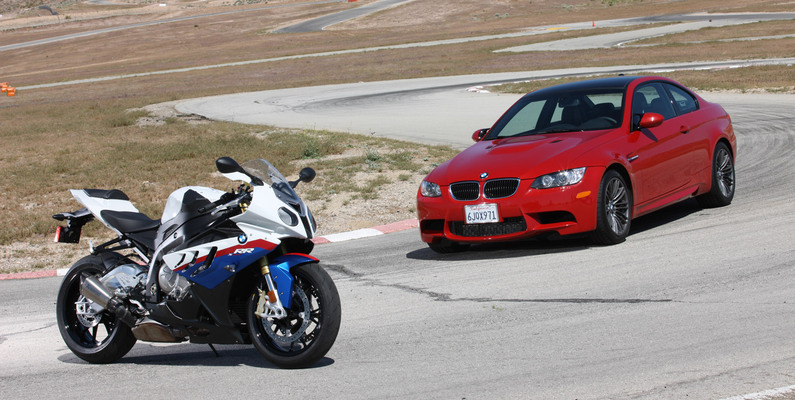

# **Imports**

In [ ]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# **Uploading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_zip_file_path = '/content/drive/My Drive/dataset.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
import zipfile

colab_zip_file_path = '/content/dataset.zip'
shutil.copy(drive_zip_file_path, colab_zip_file_path)

with zipfile.ZipFile(colab_zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# **Extracting Dataset**

In [ ]:
import os

extracted_folder = 'dataset'
print(os.listdir(extracted_folder))

['bike', 'car']


# **Dataset Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

dataset_path = 'dataset'

car_images = [os.path.join(dataset_path, 'car', img) for img in os.listdir(os.path.join(dataset_path, 'car'))]
bike_images = [os.path.join(dataset_path, 'bike', img) for img in os.listdir(os.path.join(dataset_path, 'bike'))]

train_ratio = 0.8
car_train, car_test = train_test_split(car_images, train_size=train_ratio, shuffle=True, random_state=42)
bike_train, bike_test = train_test_split(bike_images, train_size=train_ratio, shuffle=True, random_state=42)

print(f"Number of training car images: {len(car_train)}")
print(f"Number of testing car images: {len(car_test)}")
print(f"Number of training bike images: {len(bike_train)}")
print(f"Number of testing bike images: {len(bike_test)}")

Number of training car images: 1600
Number of testing car images: 400
Number of training bike images: 1600
Number of testing bike images: 400


# **Data Preprocessing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

img_size = (224, 224)

train_generator = datagen.flow_from_directory(extracted_folder,
                                              target_size=img_size,
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory(extracted_folder,
                                                   target_size=img_size,
                                                   batch_size=32,
                                                   class_mode='binary',
                                                   subset='validation')


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# **Building the CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Training the Model**

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)


Epoch 1/10
 55/100 [===============>..............] - ETA: 21s - loss: 0.7381 - accuracy: 0.6665

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 68s 585ms/step - loss: 0.5711 - accuracy: 0.7453 - val_loss: 0.3751 - val_accuracy: 0.8425
Epoch 2/10
100/100 [==============================] - 59s 593ms/step - loss: 0.2616 - accuracy: 0.8897 - val_loss: 0.2860 - val_accuracy: 0.8900
Epoch 3/10
100/100 [==============================] - 54s 546ms/step - loss: 0.2162 - accuracy: 0.9125 - val_loss: 0.3333 - val_accuracy: 0.8562
Epoch 4/10
100/100 [==============================] - 57s 576ms/step - loss: 0.1955 - accuracy: 0.9191 - val_loss: 0.2672 - val_accuracy: 0.9125
Epoch 5/10
100/100 [==============================] - 67s 668ms/step - loss: 0.1807 - accuracy: 0.9284 - val_loss: 0.2233 - val_accuracy: 0.9200
Epoch 6/10
100/100 [==============================] - 57s 571ms/step - loss: 0.1559 - accuracy: 0.9438 - val_loss: 0.2006 - val_accuracy: 0.9225
Epoch 7/10
100/100 [==============================] - 59s 588ms/step - loss: 0.1403 - accuracy: 0.9450 - val_loss: 0.1936 - val_accuracy: 0.9

# **Evaluating the Model**

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

25/25 [==============================] - 9s 355ms/step - loss: 0.2385 - accuracy: 0.9162
Test Accuracy: 91.62%


# **Making Prediction**

In [ ]:
import numpy as np
from keras.preprocessing import image

img_path = 'bike.jpeg'
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_label = "Car" if prediction > 0.5 else "Bike"
print(f"Prediction: {class_label}")

1/1 [==============================] - 0s 18ms/step
Prediction: Bike
